In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [16]:
# Read the csv file into a pandas DataFrame
player = pd.concat([pd.read_csv(f) for f in glob.glob('player_data/*.csv')], 
                             ignore_index = True)

player.head()

,+/-,08Rk,09Rk,10Rk,11Rk,12Rk,14Rk,15Rk,16Rk,17Rk,...,SH.1,SO,SV,SV%,T/O,TOI,Tm,Unnamed: 0,W,Year
0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,24.0,DET,0.0,NaN,NaN
1,-16.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,810.0,TOT,1.0,NaN,NaN
2,-7.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,295.0,CHI,4.0,NaN,NaN
3,-16.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,899.0,BUF,5.0,NaN,NaN
4,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,722.0,BOS,6.0,NaN,NaN


In [18]:
# Drop duplicate players and NaN values
cleandf = player.dropna()
cleandf

,+/-,08Rk,09Rk,10Rk,11Rk,12Rk,14Rk,15Rk,16Rk,17Rk,...,SH.1,SO,SV,SV%,T/O,TOI,Tm,Unnamed: 0,W,Year


In [26]:
# Separate variables for training and testing
X = finaldf[["S", "S%", "GW", "EV", "PP", "SH", "TOI", "PIM"]]
y = finaldf["PTS"].values.reshape(-1, 1)
print(X.shape, y.shape)

(573, 8) (573, 1)


In [27]:
# Create training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [28]:
# Create linear regression model and fit training and testing data
model = LinearRegression()

model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)


print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9055479396586532
Testing Score: 0.8817397952758785


Text(0.5, 1.0, 'Residual Plot')

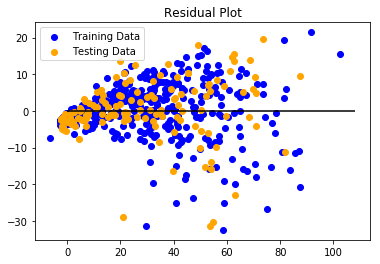

In [29]:
 # Plot the Residuals for the Training and Testing data
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [32]:
# Print MSE and r2 values
predictions = model.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 62.74273603788442, R2: 0.8817397952758785
